# Table of Contents

#### 1. Import libraries and data
#### 2. Pick out variables from data for exploratory visual analysis
            Discussion
#### 3. Create a correlation matrix
            Create a correlation heatmap using seaborn
                Discussion
            Create a correlation heatmap with updated variables (fertilizer & irrigation use)
#### 4. Create a scatterplot for the variables with the strongest correlations and examine the nature of their relationships
            'Yield_per_tons_hectare' and 'Rainfall_mm' relationship
                Discussion
            'Yield_per_tons_hectare' and 'Fertilizer_Used' relationship (boxplot)
                Discussion
            'Yield_per_tons_hectare' and 'Irrigation_Used' relationship
                Discussion
#### 5. Create a pair plot of the entire data set.
            Discussion
#### 6. Create categorical plots and interpret the results
            Creating new columns from Rainfall_mm
            Creating new columns from Temperature_Celsius
            Creating news columns from Days_to_Harvest
            Creating sample sizes for data set and bins for yield values
            Creating categorical plot for Rainfall_mm
                Discussion
            Creating categorical plot for Temperature_Celsius
                Discussion
            Creating categorical plot for Days_to_Harvest
                Discussion
            Comparing yields across different regions
                Discussion
            Comparing yields across different regions
                Discussion
            Comparing yields across different soil types
                Discussion
            Comparing yields across different weather conditions
                Discussion

#### 7. Revisit questions and write answers based on exploration
            Which variables have the strongest correlation with the crop yield?
            Is there an optimal range of rainfall that maximizes crop yield?
            Is there a trend where longer growing periods lead to higher productivity? Or does yield plateau after a certain number of days
#### 8. Define any hypotheses that you can at this point. You’ll be testing these later on
            Hypothesis 1
            Hypothesis 2
            Hypothesis 3
            Hypothesis 4
            Hypothesis 5
#### 9. Export data

## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# create shortcut path
path = r"C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis"

In [3]:
# import data set
df_crop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'crop_yield_clean.pkl'))

In [4]:
df_crop.shape

(1000000, 10)

In [5]:
df_crop.dtypes

Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used              bool
Irrigation_Used              bool
Weather_Condition          object
Days_to_Harvest             int64
Yield_tons_per_hectare    float64
dtype: object

In [6]:
df_crop.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649518
std,259.851320,7.220608,25.953412,1.696443
min,100.000896,15.000034,60.000000,0.000000
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


## 2. Pick out variables from data for exploratory visual analysis

In [12]:
# changing object variables to one-hot encoding to use in correlation matrix
df_encoded = pd.get_dummies(df_crop, columns = ['Region','Soil_Type', 'Crop', 'Weather_Condition'])

In [13]:
# create a correlation matrix

df_corr = df_encoded.corr()

In [14]:
df_corr

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Region_East,Region_North,Region_South,Region_West,...,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
Rainfall_mm,1.000000,-0.000123,-0.001076,-0.000568,-0.002669,0.764633,-0.001639,0.001804,7.083215e-05,-0.000237,...,0.000014,-0.000724,-0.000135,-0.001355,9.097803e-04,0.000846,0.000459,-0.001379,0.000400,0.000977
Temperature_Celsius,-0.000123,1.000000,0.002343,-0.000484,-0.000731,0.085551,-0.000139,-0.000714,-1.804905e-04,0.001033,...,0.000012,-0.000253,0.001389,-0.001699,-3.854384e-04,0.000270,0.000679,0.001248,-0.001051,-0.000195
Fertilizer_Used,-0.001076,0.002343,1.000000,0.001510,-0.001029,0.442106,-0.000257,-0.000635,5.680867e-04,0.000323,...,0.001009,-0.000609,0.000598,-0.001330,3.970466e-04,-0.000142,0.001087,0.000558,-0.002229,0.001671
Irrigation_Used,-0.000568,-0.000484,0.001510,1.000000,-0.001234,0.353741,-0.000085,0.000230,-7.653848e-04,0.000620,...,-0.000725,0.000013,0.000018,0.000418,-2.774232e-03,0.001150,0.001177,0.000012,0.000939,-0.000950
Days_to_Harvest,-0.002669,-0.000731,-0.001029,-0.001234,1.000000,-0.002590,0.000901,0.000168,-1.903925e-05,-0.001050,...,0.000297,-0.001196,0.000668,0.000757,1.008551e-04,-0.000673,0.000342,0.000022,0.000643,-0.000665
Yield_tons_per_hectare,0.764633,0.085551,0.442106,0.353741,-0.002590,1.000000,-0.001320,0.001582,-2.159382e-04,-0.000046,...,-0.000280,-0.000540,0.000360,-0.002134,3.353749e-04,0.001114,0.000865,-0.000941,-0.000084,0.001025
Region_East,-0.001639,-0.000139,-0.000257,-0.000085,0.000901,-0.001320,1.000000,-0.333219,-3.331137e-01,-0.333132,...,-0.000297,-0.000323,0.001549,-0.000779,-8.229875e-04,0.002772,-0.002393,-0.000922,-0.000342,0.001264
Region_North,0.001804,-0.000714,-0.000635,0.000230,0.000168,0.001582,-0.333219,1.000000,-3.335351e-01,-0.333553,...,0.000967,0.000328,-0.000812,0.000589,1.227208e-03,-0.003082,0.001747,-0.000288,0.000495,-0.000207
Region_South,0.000071,-0.000180,0.000568,-0.000765,-0.000019,-0.000216,-0.333114,-0.333535,1.000000e+00,-0.333447,...,-0.000750,0.000005,-0.000944,0.000062,-4.192414e-08,0.000240,0.000637,0.000822,-0.001407,0.000585
Region_West,-0.000237,0.001033,0.000323,0.000620,-0.001050,-0.000046,-0.333132,-0.333553,-3.334471e-01,1.000000,...,0.000078,-0.000010,0.000207,0.000128,-4.047517e-04,0.000071,0.000009,0.000388,0.001254,-0.001641


I utilized one-hot encoding to label each region, soil type, crop, and weather condition to the unique output and created multiple columns to view the correlation coefficients

## 3. Create a correlation matrix

<function matplotlib.pyplot.show(close=None, block=None)>

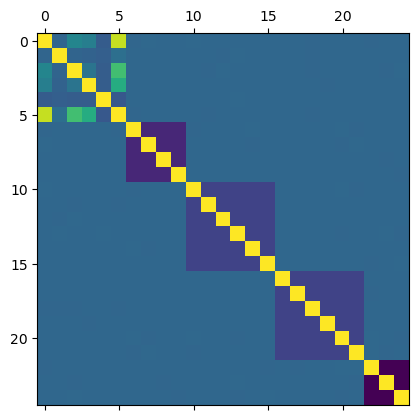

In [17]:
# create a correlation heatmap from df_corr

plt.matshow(df_corr.corr())
plt.show

Text(0.5, 1.0, 'Correlation Matrix')

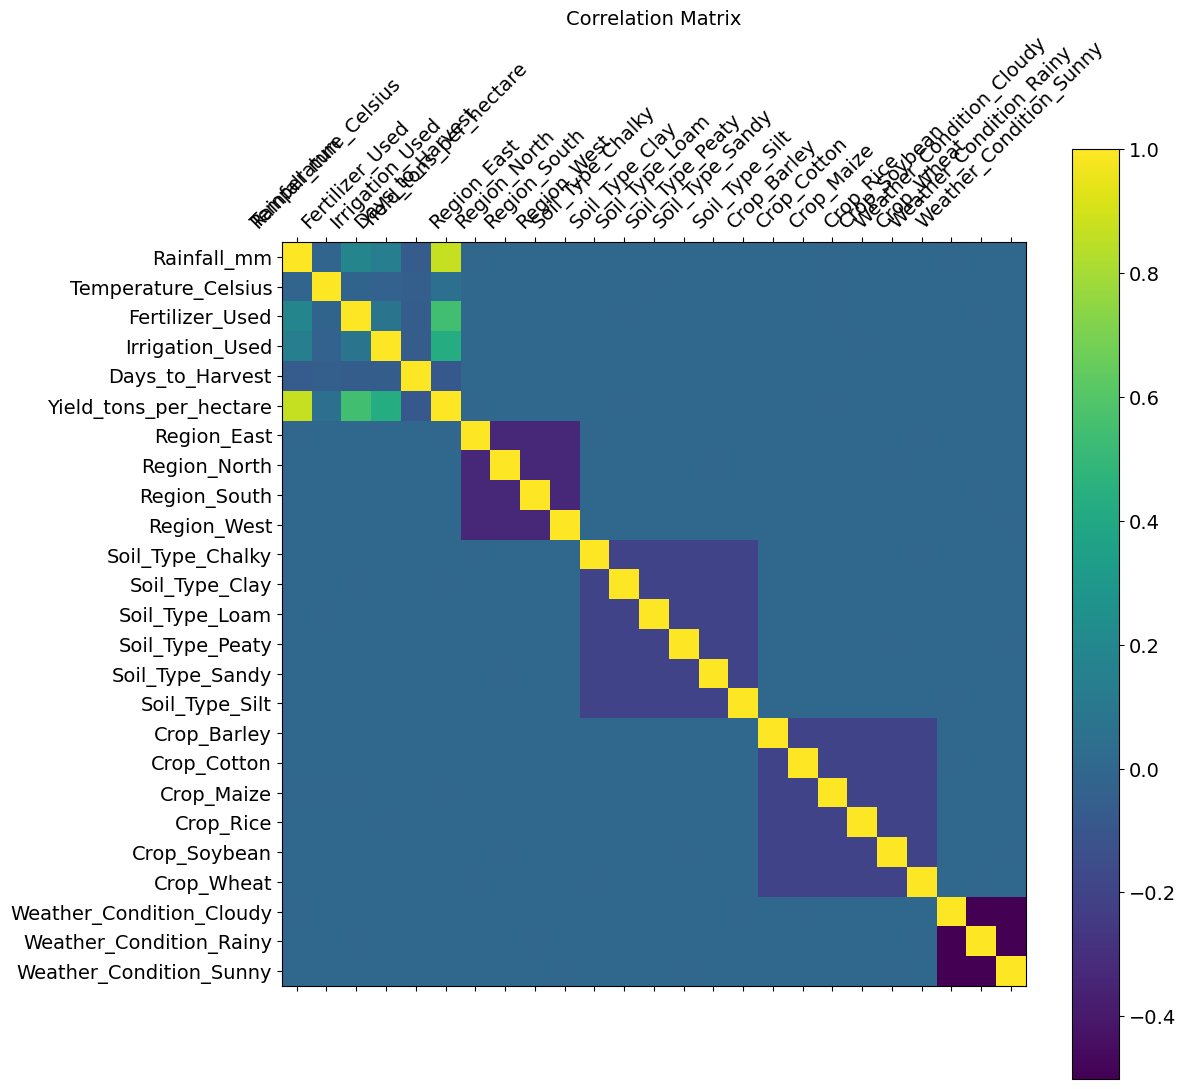

In [18]:
# add labels, legend, and change size

f = plt.figure(figsize = (12, 12)) # figure size
plt.matshow(df_corr.corr(), fignum = f.number) # type of plot
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize = 14, rotation = 45) # x axis labels
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize = 14) # y axis labels
cb = plt.colorbar() # add a color legend (called colorbar)
cb.ax.tick_params(labelsize = 14) # add a font size
plt.title('Correlation Matrix', fontsize = 14) # add a title

#### Create a correlation heatmap using seaborn

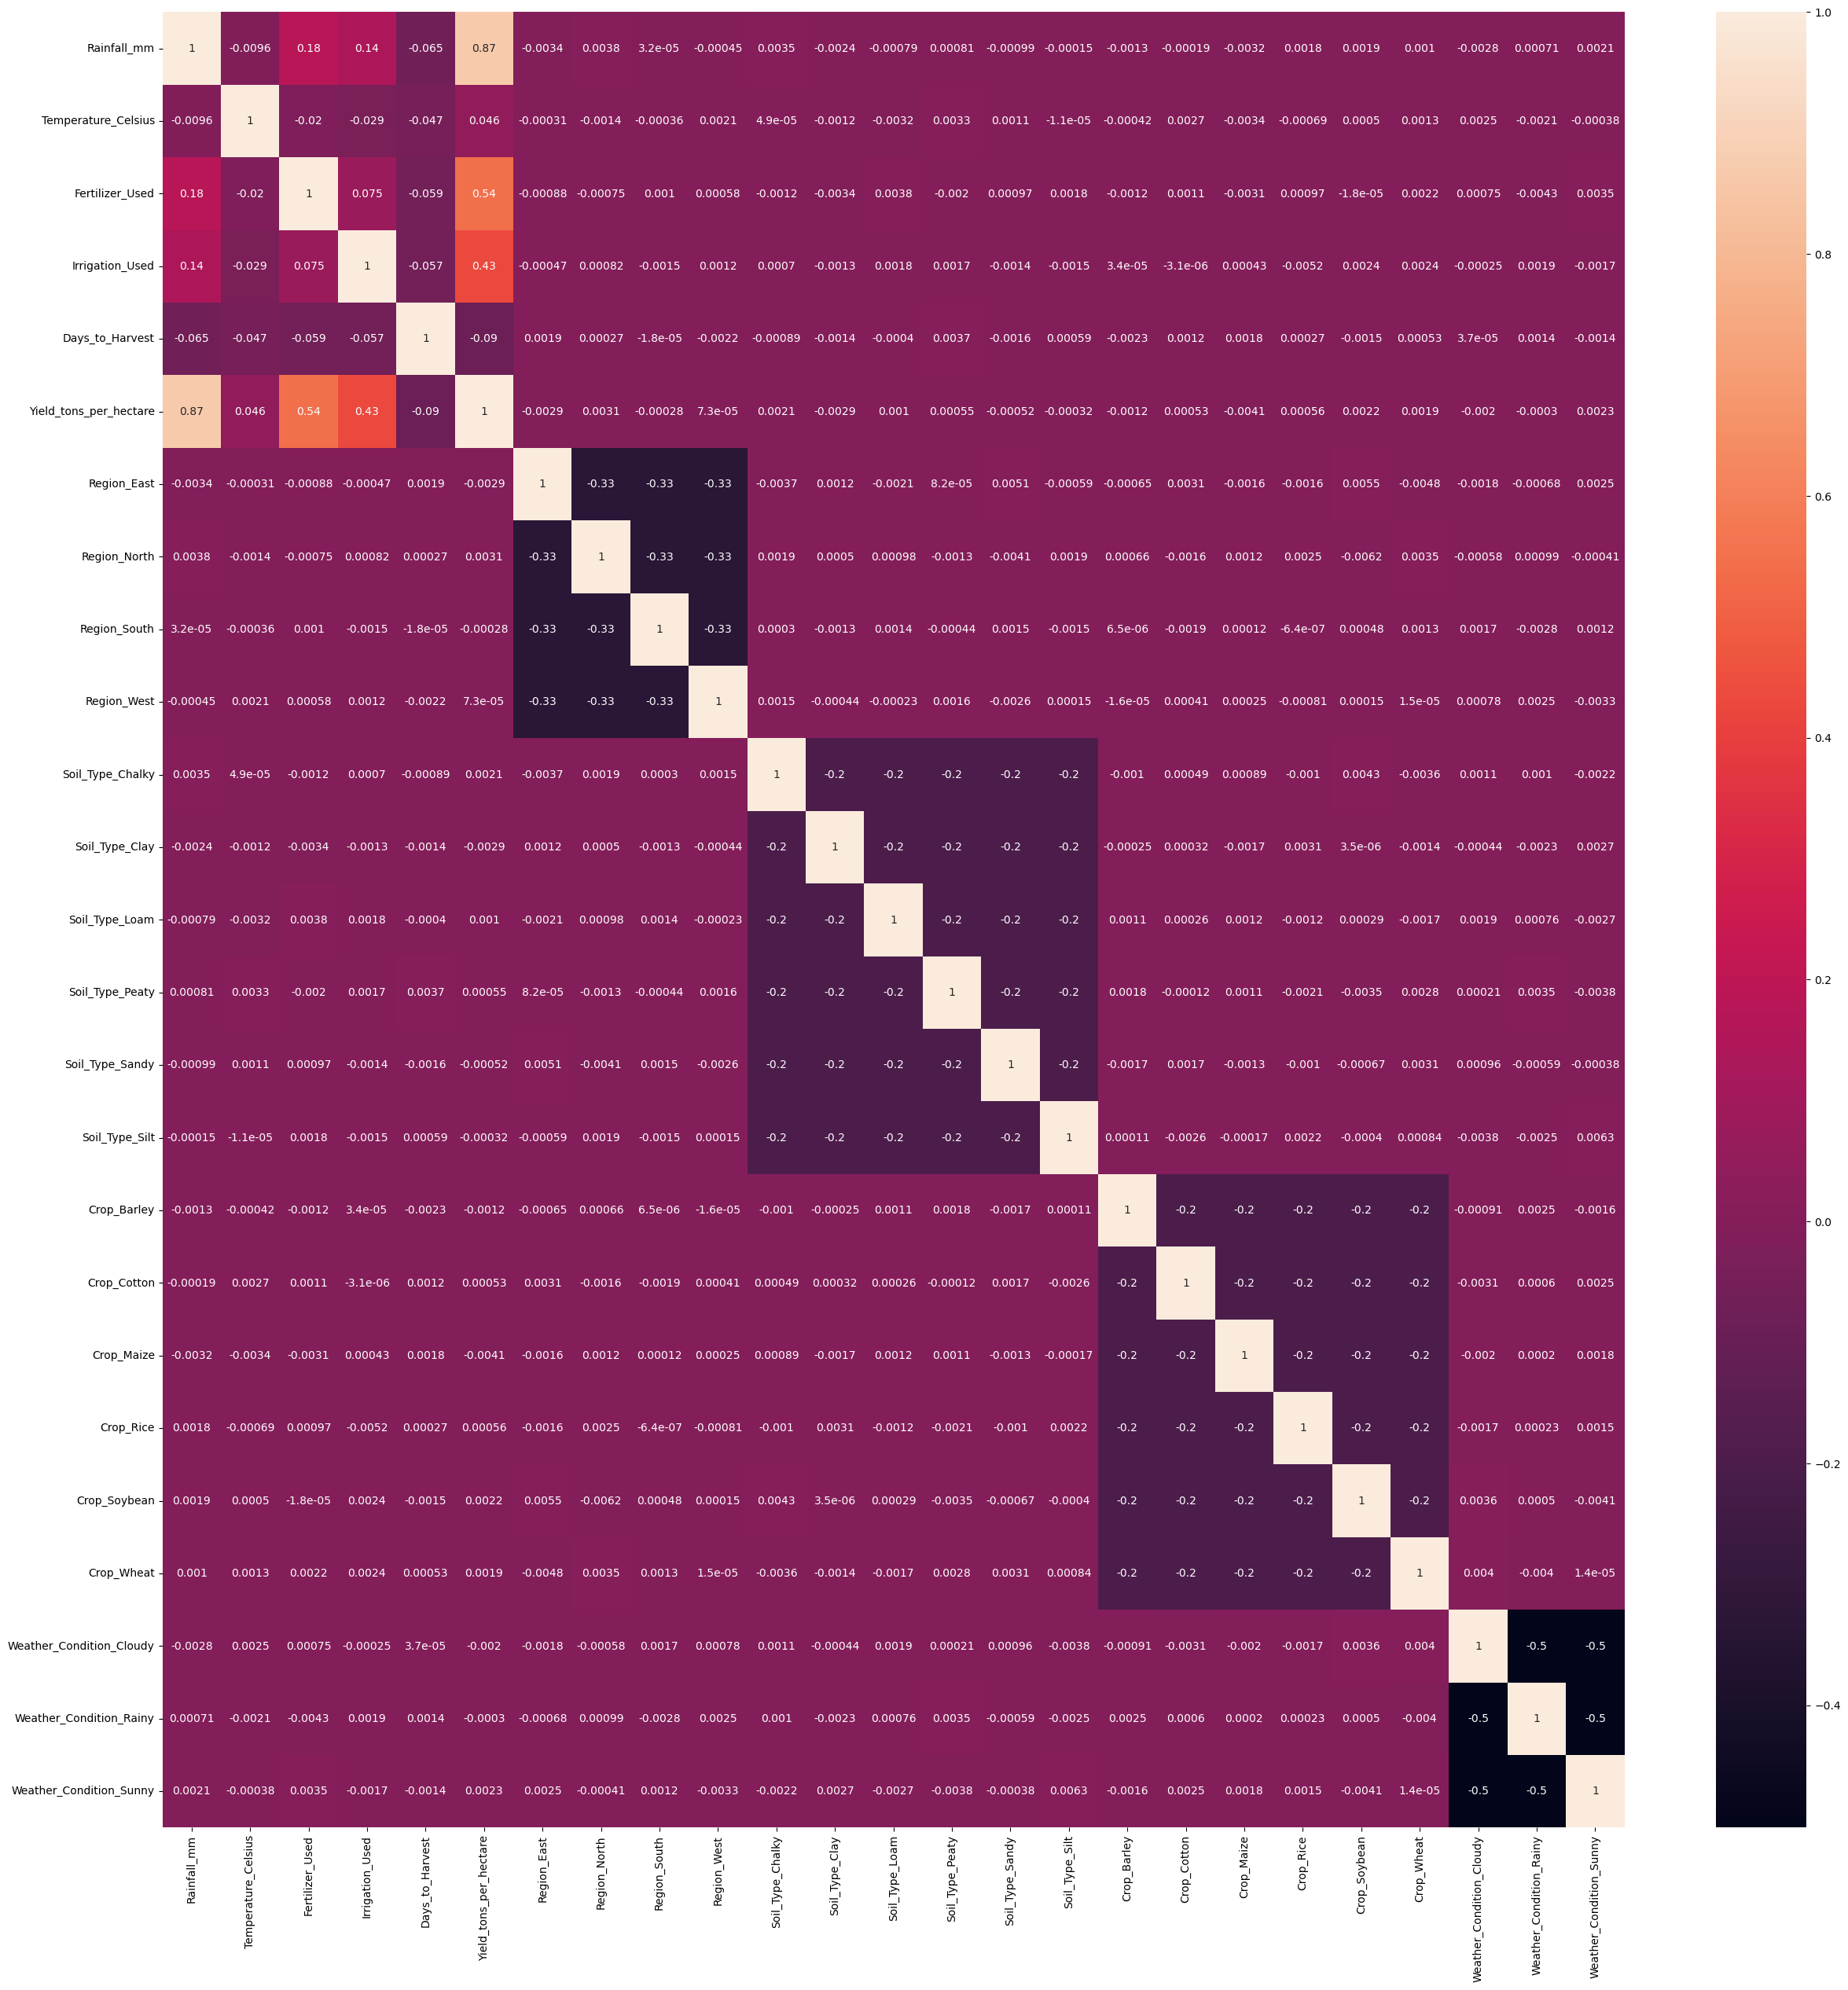

In [20]:
# create a subplot with matplotlib
f,ax = plt.subplots(figsize=(30,30))

# create a correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and subplots defined in df_corr
corr = sns.heatmap(df_corr.corr(), annot = True, ax = ax) # The 'annot' argument allows the plot to place the correlation coefficients onto the heatmap.

# save the heatmap
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'corr_matrix.png'), bbox_inches='tight')

# show the plot
plt.show()

#### Discussion

A 0 correlation coefficient means 'no relationship', a 01. - 0.3 means 'weak relationship', a 0.3 - 0.5 means 'moderate relationship', and a 0.5 - 1.0 means 'strong relationship'. Pretty much all of the hot-label encoding variables result in a 'no relationship'. The main variable to look at is the 'Yield_tons_per_hectare' row where the strongest relationship is with 'Rainfall_mm' at 0.87. The next strongest relationship with yield is 'Fertilizer_Used' at 0.54.hip

### Create a correlation heatmap with updated variables (fertilizer & irrigation use)

In [7]:
# Create new columns based on the boolean values
df_crop['Fertilizer_Yes'] = df_crop['Fertilizer_Used'].astype(int)  # True=1, False=0
df_crop['Fertilizer_No'] = (~df_crop['Fertilizer_Used']).astype(int)  # True=0, False=1

df_crop['Irrigation_Yes'] = df_crop['Irrigation_Used'].astype(int)  # True=1, False=0
df_crop['Irrigation_No'] = (~df_crop['Irrigation_Used']).astype(int)  # True=0, False=1

In [9]:
df_crop.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Fertilizer_Yes,Fertilizer_No,Irrigation_Yes,Irrigation_No
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816,0,1,1,0
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341,1,0,1,0
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443,0,1,0,1
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573,0,1,1,0
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251,1,0,1,0


In [11]:
df_crop_2 = df_crop[['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare', 'Fertilizer_Yes', 'Fertilizer_No', 'Irrigation_Yes', 'Irrigation_No']]

In [13]:
# Create a correlation matrix using pandas

df_crop_2.corr()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare,Fertilizer_Yes,Fertilizer_No,Irrigation_Yes,Irrigation_No
Rainfall_mm,1.000000,-0.000123,-0.002669,0.764633,-0.001076,0.001076,-0.000568,0.000568
Temperature_Celsius,-0.000123,1.000000,-0.000731,0.085551,0.002343,-0.002343,-0.000484,0.000484
Days_to_Harvest,-0.002669,-0.000731,1.000000,-0.002590,-0.001029,0.001029,-0.001234,0.001234
Yield_tons_per_hectare,0.764633,0.085551,-0.002590,1.000000,0.442106,-0.442106,0.353741,-0.353741
Fertilizer_Yes,-0.001076,0.002343,-0.001029,0.442106,1.000000,-1.000000,0.001510,-0.001510
Fertilizer_No,0.001076,-0.002343,0.001029,-0.442106,-1.000000,1.000000,-0.001510,0.001510
Irrigation_Yes,-0.000568,-0.000484,-0.001234,0.353741,0.001510,-0.001510,1.000000,-1.000000
Irrigation_No,0.000568,0.000484,0.001234,-0.353741,-0.001510,0.001510,-1.000000,1.000000


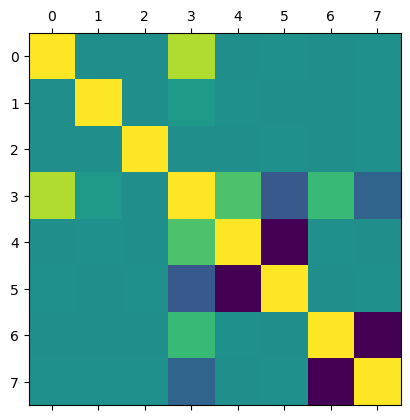

In [15]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_crop_2.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

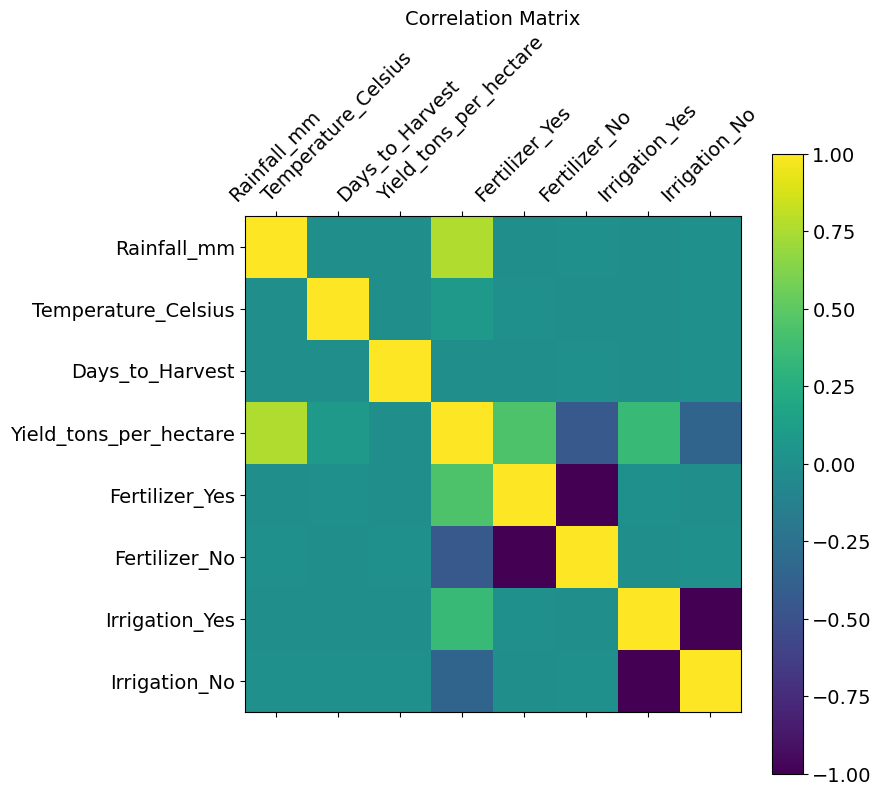

In [17]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_crop_2.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_crop_2.shape[1]), df_crop_2.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_crop_2.shape[1]), df_crop_2.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

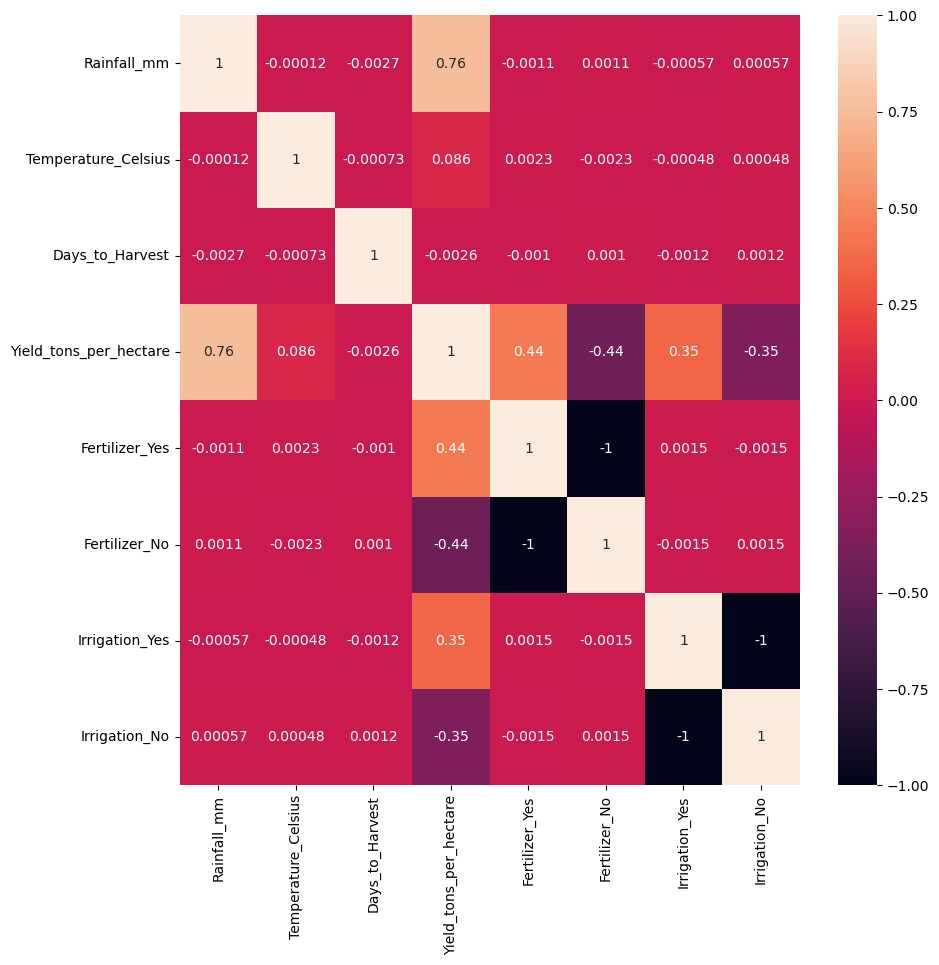

Heatmap saved at: C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis\04 Analysis\Visualizations\correlation_heatmap_updated.png


In [21]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplot defined above
corr = sns.heatmap(df_crop_2.corr(), annot=True, ax=ax)  # annot=True places the correlation coefficients onto the heatmap

# Specify the path and filename for saving the heatmap
path = r"C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis\04 Analysis\Visualizations\correlation_heatmap_updated.png"

# Save the figure to the specified path
plt.savefig(path, format='png', bbox_inches='tight')  # Save the heatmap as a PNG file

# Show the plot (optional, if you want to display it in the notebook)
plt.show()

print(f"Heatmap saved at: {path}")

## 4. Create a scatterplot for the variables with the strongest correlations and examine the nature of their relationships

### 'Yield_per_tons_hectare' and 'Rainfall_mm' relationship

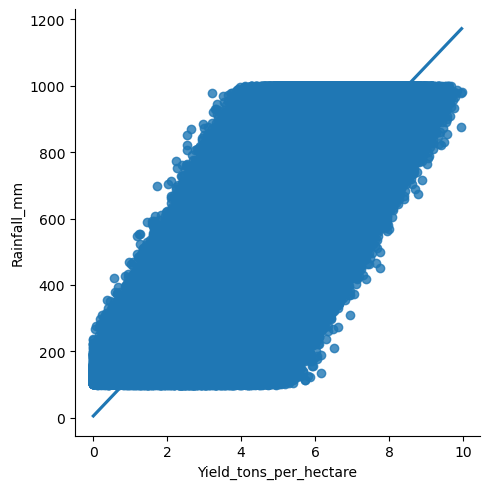

In [23]:
# Create a scatterplot for the yield and rainfall columns in seaborn

sns.lmplot(x = 'Yield_tons_per_hectare', y = 'Rainfall_mm', data = df_crop)

### Discussion

There is a strong correlation between yield and rainfall amount. As the rainfall increases, so does the yield of the crop. Even though there is a correlation, it is difficult to interpret because there is still significant yield from lower rainfalls and lower yields from higher rainfalls.

### 'Yield_per_tons_hectare' and 'Fertilizer_Used' relationship

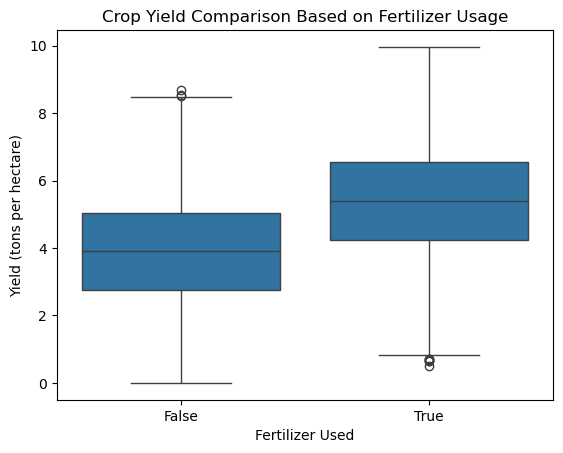

In [11]:
# Create a boxplot to compare crop yield based on fertilizer usage using seaborn
sns.boxplot(x='Fertilizer_Used', y='Yield_tons_per_hectare', data=df_crop)

# Add labels and a title
plt.xlabel('Fertilizer Used')
plt.ylabel('Yield (tons per hectare)')
plt.title('Crop Yield Comparison Based on Fertilizer Usage')
plt.show()

### Discussion

In the boxplot, the crops that used fertilizers had a clear increase in yield across the median and quartiles.

### 'Yield_per_tons_hectare' and 'Irrigation_Used' relationship

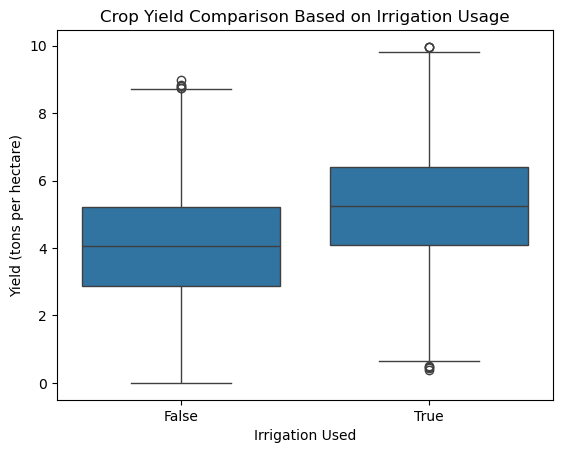

In [14]:
# Create a boxplot to compare crop yield based on fertilizer usage using seaborn
sns.boxplot(x='Irrigation_Used', y='Yield_tons_per_hectare', data=df_crop)

# Add labels and a title
plt.xlabel('Irrigation Used')
plt.ylabel('Yield (tons per hectare)')
plt.title('Crop Yield Comparison Based on Irrigation Usage')
plt.show()

### Discussion

In the boxplot, the crops that used irrigation had a clear increase in yield across the median and quartiles.

## 5. Create a pair plot of the entire data set.

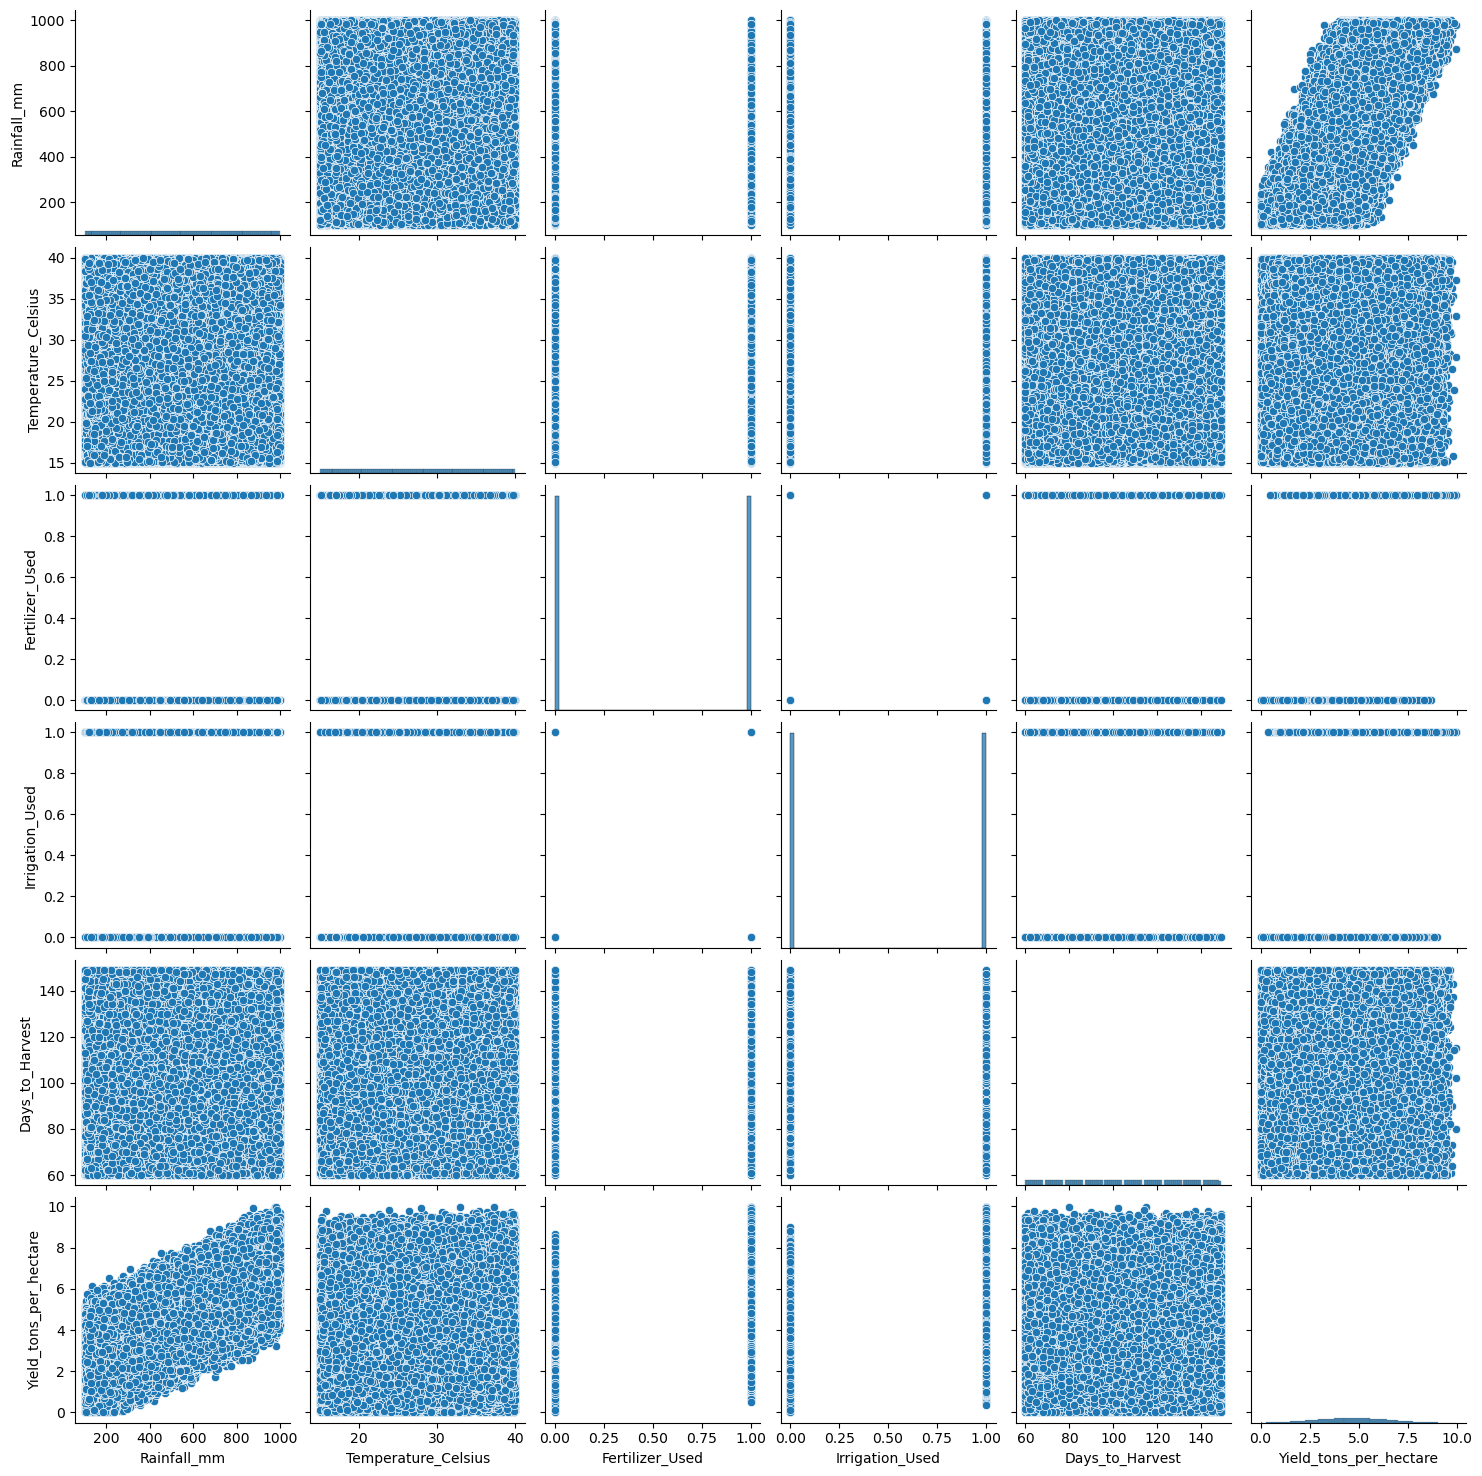

In [29]:
# Create a pair plot using the float, bool and integer variables

g = sns.pairplot(df_crop)

### Discussion

In the pair plots above, I am having a difficult time finding any correlations others than the rainfall and yields. The rest of the data looks to be evenly split throughout their respective ranges. I am probably going to have to create additional columns with ranges for 'Temperature_Celsius', 'Rainfall_mm' and 'Days_to_Harvest' and try to extrapolate insights from there based on regions, soil type, weather conditions and crop.

## 6. Create categorical plots and interpret the results

### Creating new columns from rainfall_mm

<Axes: xlabel='Rainfall_mm', ylabel='Count'>

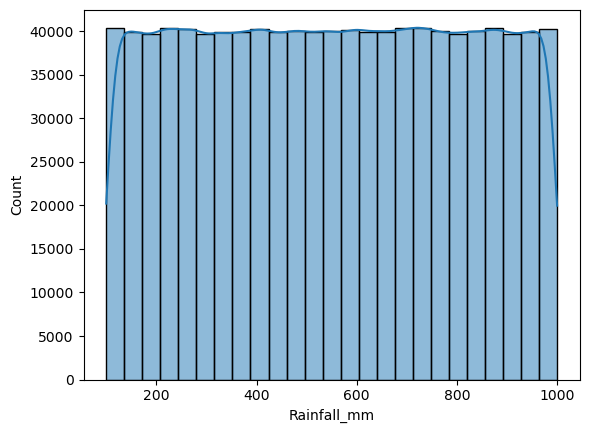

In [16]:
# using a histogram to visualize the distribution of the rainfall variable

sns.histplot(df_crop['Rainfall_mm'], bins = 25, kde = True)

In [17]:
# deriving new variables for rainfall amounts

df_crop.loc[df_crop['Rainfall_mm'] < 250, 'Rainfall_group'] = 'Very Low'

In [18]:
df_crop.loc[(df_crop['Rainfall_mm'] >= 250) & (df_crop['Rainfall_mm'] < 400),  'Rainfall_group'] = 'Low'

In [19]:
df_crop.loc[(df_crop['Rainfall_mm'] >= 400) & (df_crop['Rainfall_mm'] < 600),  'Rainfall_group'] = 'Moderate'

In [20]:
df_crop.loc[(df_crop['Rainfall_mm'] >= 600) & (df_crop['Rainfall_mm'] < 800),  'Rainfall_group'] = 'High'

In [21]:
df_crop.loc[(df_crop['Rainfall_mm'] >= 800),  'Rainfall_group'] = 'Very High'

In [22]:
df_crop['Rainfall_group'].value_counts(dropna = False)

Rainfall_group
High         222658
Moderate     222091
Very High    222068
Very Low     166939
Low          166244
Name: count, dtype: int64

## Creating new columns from Temperature_Celsius

<Axes: xlabel='Temperature_Celsius', ylabel='Count'>

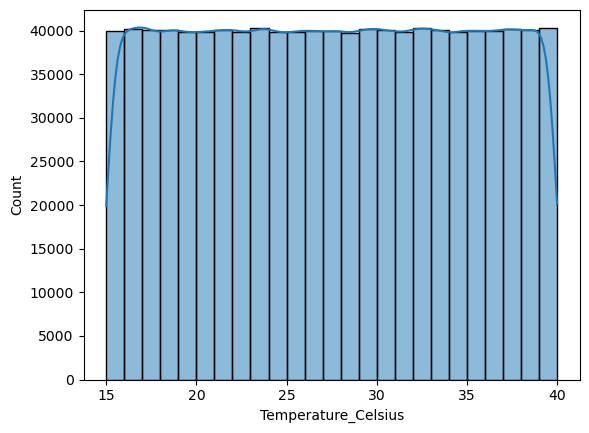

In [31]:
# using a histogram to visualize the distribution of the temperature variable

sns.histplot(df_crop['Temperature_Celsius'], bins = 25, kde = True)

In [29]:
# deriving new variables for temperature ranges

df_crop.loc[df_crop['Temperature_Celsius'] <= 20, 'Temperature_range'] = 'Cool'

In [30]:
df_crop.loc[(df_crop['Temperature_Celsius'] > 20) & (df_crop['Temperature_Celsius'] <= 25),  'Temperature_range'] = 'Mild'

In [31]:
df_crop.loc[(df_crop['Temperature_Celsius'] > 25) & (df_crop['Temperature_Celsius'] <= 30),  'Temperature_range'] = 'Warm'

In [32]:
df_crop.loc[(df_crop['Temperature_Celsius'] > 30) & (df_crop['Temperature_Celsius'] <= 35),  'Temperature_range'] = 'Hot'

In [33]:
df_crop.loc[(df_crop['Temperature_Celsius'] > 35),  'Temperature_range'] = 'Very Hot'

In [34]:
df_crop['Temperature_range'].value_counts(dropna = False)

Temperature_range
Very Hot    200353
Cool        200104
Hot         200026
Mild        199859
Warm        199658
Name: count, dtype: int64

## Creating news columns from Days_to_Harvest

<Axes: xlabel='Days_to_Harvest', ylabel='Count'>

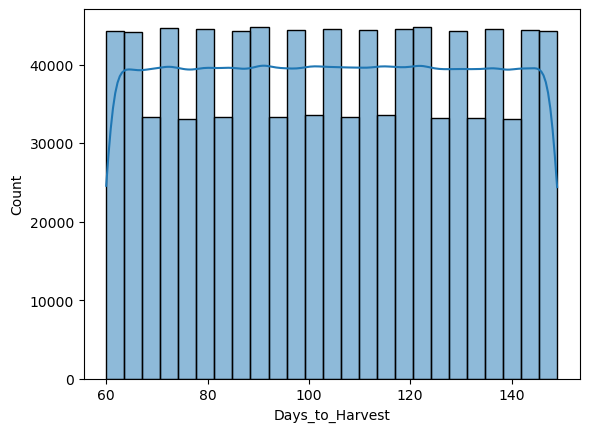

In [46]:
# using a histogram to visualize the distribution of the temperature variable

sns.histplot(df_crop['Days_to_Harvest'], bins = 25, kde = True)

In [41]:
# deriving new variables for days to harvest ranges

df_crop.loc[df_crop['Days_to_Harvest'] <= 80, 'Harvest_range'] = 'Short-Term Harvest'

In [42]:
df_crop.loc[(df_crop['Days_to_Harvest'] > 80) & (df_crop['Days_to_Harvest'] <= 100),  'Harvest_range'] = 'Moderate-Term Harvest'

In [43]:
df_crop.loc[(df_crop['Days_to_Harvest'] > 100) & (df_crop['Days_to_Harvest'] <= 120),  'Harvest_range'] = 'Long-Term Harvest'

In [44]:
df_crop.loc[(df_crop['Days_to_Harvest'] > 120),  'Harvest_range'] = 'Extended Harvest'

In [45]:
df_crop['Harvest_range'].value_counts(dropna = False)

Harvest_range
Extended Harvest         321710
Short-Term Harvest       232950
Long-Term Harvest        222920
Moderate-Term Harvest    222420
Name: count, dtype: int64

## Creating sample sizes for data set and bins for yield values

In [60]:
# creating list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_crop)) <= 0.7

In [62]:
# Store 70% of the sample in the dataframe big
big = df_crop[dev]

In [64]:
# Store 30% of the sample in the dataframe small
small = df_crop[~dev]

In [66]:
# Create bins with a step of 0.05, starting from the minimum to the maximum yield
bins = pd.interval_range(start=small['Yield_tons_per_hectare'].min(), 
                         end=small['Yield_tons_per_hectare'].max(), 
                         freq=1)

# Create a new column with the grouped values
small['Yield_group'] = pd.cut(small['Yield_tons_per_hectare'], bins=bins)

# Check the updated DataFrame
print(small.head())

   Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0    West     Sandy   Cotton   897.077239            27.676966   
2   North      Loam   Barley   147.998025            29.794042   
3   North     Sandy  Soybean   986.866331            16.644190   
6    West      Clay    Wheat   357.902357            31.593431   
10  North     Peaty    Wheat   385.135314            21.656192   

    Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0             False             True            Cloudy              122   
2             False            False             Sunny              106   
3             False             True             Rainy              146   
6             False            False             Rainy               90   
10            False            False             Sunny               73   

    Yield_tons_per_hectare Rainfall_group Temperature_range  \
0                 6.555816      Very High              Warm   
2                 1.127443

C:\Users\HP\AppData\Local\Temp\ipykernel_24268\1779666605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['Yield_group'] = pd.cut(small['Yield_tons_per_hectare'], bins=bins)


## Creating categorical plot for Rainfall_mm

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


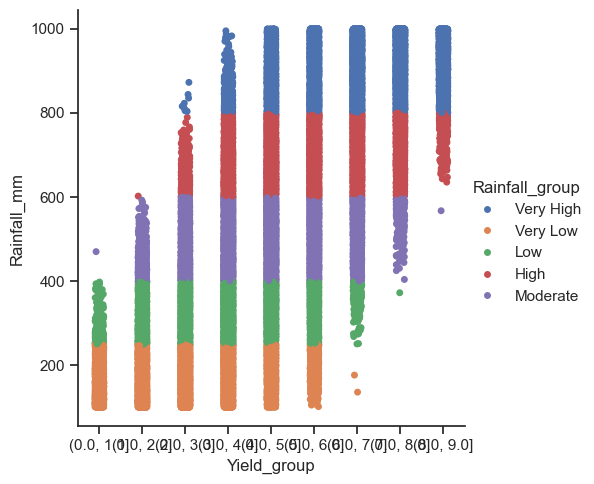

In [69]:
# create a categorical plot in seaborn using the rainfall categories created above

sns.set(style="ticks")
rainfall_cat_plot = sns.catplot(x="Yield_group", y="Rainfall_mm", hue="Rainfall_group", data=small)

### Discussion

In the graph above, we can clearly see that the more rainfall increases the yield. I don't think this graph tells me what I don't already know though

## Creating categorical plot for Temperature_Celsius

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


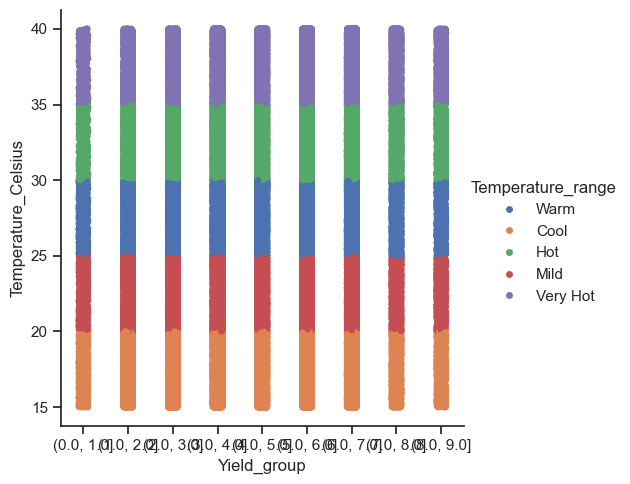

In [73]:
# create a categorical plot in seaborn using the temperature range created above

sns.set(style="ticks")
rainfall_cat_plot = sns.catplot(x="Yield_group", y="Temperature_Celsius", hue="Temperature_range", data=small)

### Discussion

This graph does not tell me much either because the yields are evenly distributed across the temperature ranges.

## Creating categorical plot for Days_to_Harvest

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


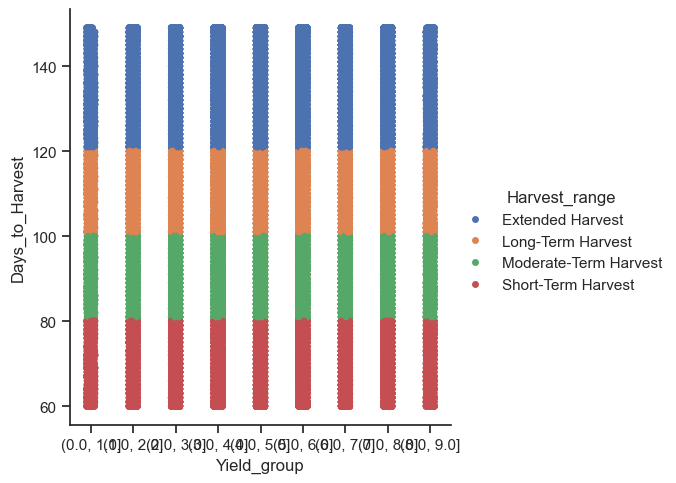

In [80]:
# create a categorical plot in seaborn using the Harvest range created above

sns.set(style="ticks")
rainfall_cat_plot = sns.catplot(x="Yield_group", y="Days_to_Harvest", hue="Harvest_range", data=small)

### Discussion

This graph does not tell me much either because the yields are evenly distributed across the harvest ranges.

## Comparing yields across different regions

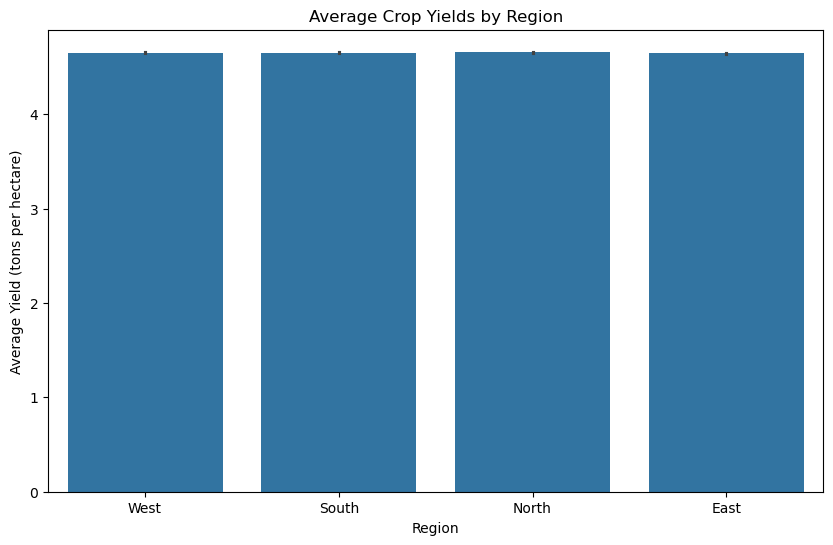

In [58]:
# creating bar chart to show yields across regions

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Yield_tons_per_hectare', data=df_crop)
plt.xlabel('Region')
plt.ylabel('Average Yield (tons per hectare)')
plt.title('Average Crop Yields by Region')
plt.show()

### Discussion

Yields are evenly split across regions

## Comparing yields across different crops

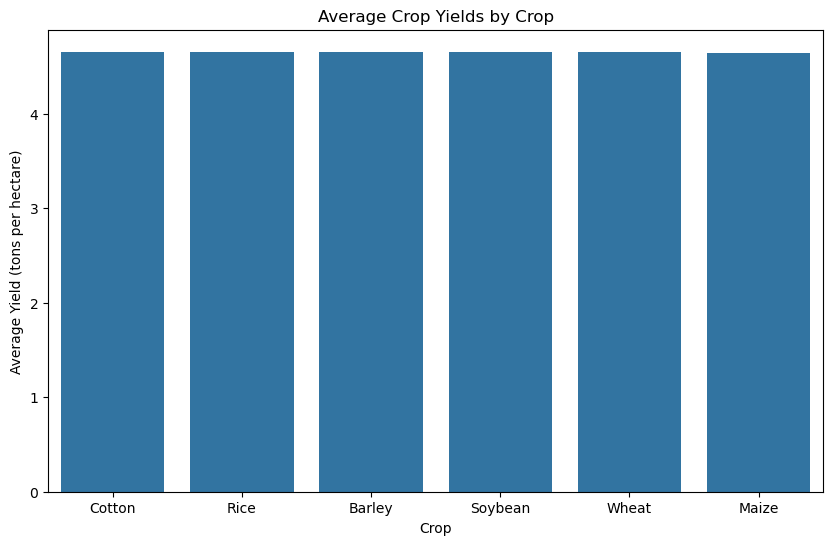

In [66]:
# creating bar chart to show yields across crops

plt.figure(figsize=(10, 6))
sns.barplot(x='Crop', y='Yield_tons_per_hectare', data=df_crop, errorbar=None)
plt.xlabel('Crop')
plt.ylabel('Average Yield (tons per hectare)')
plt.title('Average Crop Yields by Crop')
plt.show()

### Discussion

Yields are evenly split across crops

## Comparing yields across different soil types

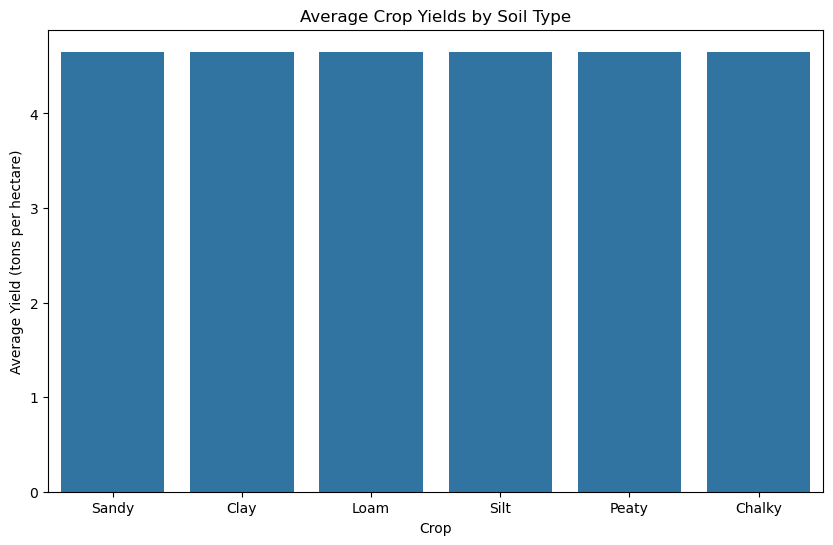

In [71]:
# creating bar chart to show yields across soil types

plt.figure(figsize=(10, 6))
sns.barplot(x='Soil_Type', y='Yield_tons_per_hectare', data=df_crop, errorbar=None)
plt.xlabel('Crop')
plt.ylabel('Average Yield (tons per hectare)')
plt.title('Average Crop Yields by Soil Type')
plt.show()

### Discussion

Yields are evenly split across soil types

## Comparing yields across different weather conditions

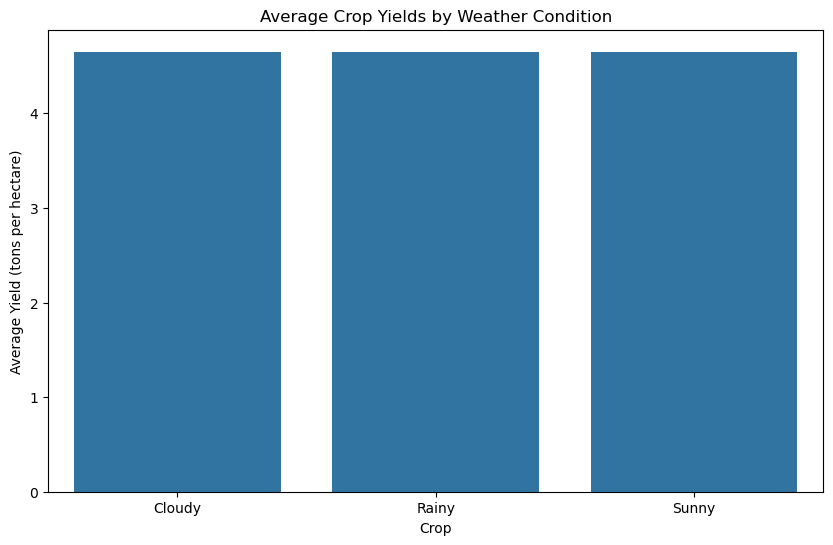

In [78]:
# creating bar chart to show yields across weather conditions

plt.figure(figsize=(10, 6))
sns.barplot(x='Weather_Condition', y='Yield_tons_per_hectare', data=df_crop, errorbar=None)
plt.xlabel('Crop')
plt.ylabel('Average Yield (tons per hectare)')
plt.title('Average Crop Yields by Weather Condition')
plt.show()

### Discussion

Yields are evenly split across soil types

## 7. Revisit questions and write answers based on exploration

### Which variables have the strongest correlation with the crop yield?

Rainfall has the strongest correlation with crop yield at a correlation coefficient of 0.87 indicating a strong relationship. We can see that as the rainfall increases so does the yield.

## Is there an optimal range of rainfall that maximizes crop yield?

Once rainfall reaches 250mm or above, the yield will be at least 6 tons per hectare (for the most part). Anything 250mm or above is an adequate amount of rainfall to return a high yield.

## Is there a trend where longer growing periods lead to higher productivity? Or does yield plateau after a certain number of days?

There is not a trend where longer growing periods lead to higher productivity. Across all harvest ranges, there is equal distribution of yield ranging from low yield to high yield. It must be dependant on other variables.

## 8. Define any hypotheses that you can at this point. You’ll be testing these later on.

### Hypothesis 1

The use of fertilizer significantly increases yield for crops that require high fertilizer use such as cotton, maize, and corn.

### Hypothesis 2

Irrigation mitigates the negative impact of low rainfall on yield

### Hypothesis 3

Sandy and loam (balance of sand, silt and clay) benefits the most from irrigation and high rainfall.

### Hypothesis 4

Clay soil does not need irrigation to produce high yields due to its natural ability to retain moisture.

### Hypothesis 5

Sunny weather conditions with irrigation produce higher yields compared to sunny conditions without irrigation.

## 9. Export Data

In [51]:
df_crop.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,Rainfall_group,Temperature_range,Harvest_range
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816,Very High,Warm,Extended Harvest
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341,Very High,Cool,Extended Harvest
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443,Very Low,Warm,Long-Term Harvest
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573,Very High,Cool,Extended Harvest
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251,High,Hot,Long-Term Harvest


In [53]:
df_crop.shape

(1000000, 13)

In [55]:
# exporting data

df_crop.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'crop_yield_v2.pkl'))